In [2]:
import matplotlib.pyplot as plt
import time
import random

In [3]:
class RBNode:

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.colour = "R"

    def get_uncle(self):
        return

    def is_leaf(self):
        return self.left == None and self.right == None

    def is_left_child(self):
        return self == self.parent.left

    def is_right_child(self):
        return not self.is_left_child()

    def is_red(self):
        return self.colour == "R"

    def is_black(self):
        return not self.is_red()

    def make_black(self):
        self.colour = "B"

    def make_red(self):
        self.colour = "R"

    def get_brother(self):
        if self.parent.right == self:
            return self.parent.left
        return self.parent.right

    def get_uncle(self):
        return self.parent.get_brother()

    def uncle_is_black(self):
        if self.get_uncle() == None:
            return True
        return self.get_uncle().is_black()

    def __str__(self):
        return "(" + str(self.value) + "," + self.colour + ")"

    def __repr__(self):
         return "(" + str(self.value) + "," + self.colour + ")"

    def rotate_right(self):
        pivot = self.left
        temp = pivot.right

        # Perform rotation
        pivot.right = self
        self.left = temp

        # Update parents
        pivot.parent = self.parent
        self.parent = pivot

        if pivot.parent is None:
            self = pivot

        return pivot

    def rotate_left(self):
        pivot = self.right
        temp = pivot.left

        # Perform rotation
        pivot.left = self
        self.right = temp

        # Update parents
        pivot.parent = self.parent
        self.parent = pivot

        if pivot.parent is None:
            self = pivot

        return 0

In [4]:
class RBTree:

    def __init__(self,):
        self.root = None

    def is_empty(self,):
        return self.root == None

    def get_height(self,):
        if self.is_empty():
            return 0
        return self.__get_height(self.root)

    def __get_height(self, node):
        if node == None:
            return 0
        return 1 + max(self.__get_height(node.left), self.__get_height(node.right))

    def insert(self, value):
        if self.is_empty():
            self.root = RBNode(value)
            self.root.make_black()
        else:
            self.__insert(self.root, value)

    def __insert(self, node, value):
        if value < node.value:
            if node.left == None:
                node.left = RBNode(value)
                node.left.parent = node
                self.fix(node.left)
            else:
                self.__insert(node.left, value)
        else:
            if node.right == None:
                node.right = RBNode(value)
                node.right.parent = node
                self.fix(node.right)
            else:
                self.__insert(node.right, value)

    def fix(self, node):
        while node.parent and node.parent.is_red():
            if node.parent.is_left_child():
                uncle = node.get_uncle() 
                if uncle and uncle.is_red():
                    node.parent.make_black()
                    uncle.make_black()
                    node.parent.parent.make_red()
                    node = node.parent.parent
                else:
                    if node.is_right_child():
                        node = node.parent
                        node.rotate_left()
                    node.parent.make_black()
                    node.parent.parent.make_red()
                    node.parent.parent.rotate_right()

            else: 
                uncle = node.get_uncle()
                if uncle and uncle.is_red():
                    node.parent.make_black()
                    uncle.make_black()
                    node.parent.parent.make_red()   
                    node = node.parent.parent
                else:
                    if node.is_left_child():
                        node = node.parent
                        node.rotate_right()
                    node.parent.make_black()
                    node.parent.parent.make_red()
                    node.parent.parent.rotate_left()

        self.root.make_black() 

    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node.is_leaf():
            return "[" + str(node) + "]"
        if node.left == None:
            return "[" + str(node) + " -> " + self.__str_helper(node.right) + "]"
        if node.right == None:
            return "[" +  self.__str_helper(node.left) + " <- " + str(node) + "]"
        return "[" + self.__str_helper(node.left) + " <- " + str(node) + " -> " + self.__str_helper(node.right) + "]"

IndentationError: expected an indented block after 'while' statement on line 46 (87019639.py, line 48)

# Part 1: Implementing and Analyzing Red-Black Trees

In your 2C03 lectures, you have studied Red-Black Trees (RBT) and seen (at least in theory) how they are implemented. If you do not remember them or never studied them, now is the time. Given in the notebook is a partial implementation of Red-Black Trees with three methods `rotate_left()`, `rotate_right()`, and `fix()`. `rotate_left` performs the operation of rotating the node left and `rotate_right` performs the operation of rotating the node right. The nodes also point back to their parents, and the `fix` method updates the tree once the rotation has been made.


In this exercise, complete these implementations by enforcing the properties of Binary Search Trees that make it an RBT. Two of these properties are:

- Red nodes cannot have red children.
- All simple paths from the root to a leaf must contain the same number of black nodes.

Every time you insert an element in the tree, the above properties get violated and need to be fixed.


## Part 1.2
In this section, you will compare your implementation against traditional implementations. Take ALL the
Binary Search implementations we have discussed in the first few weeks and design an experiment to
compare the performance against your dynamic implementation.
In your reflection section, describe in detail the experiment design, what are the various list sizes and the
number of trials you chose. Also, describe your observations. Did you notice any performance
improvement? When does dynamic binary search outperform others? When is it an overkill? Describe in
detail your experiments design, and the observations.

## Part 1.3
In this experiment, generate a perfectly sorted list and record the difference between the height of the two
trees for multiple rounds. Then create different versions of the list varying the level of “unsortedness”
(like you have done in previous labs with near-sorted lists and unsorted lists). You can use controlled
quicksort to create these versions of near-sorted list. In your reflection, describe the experiment design,
and the runs, and show in the graph how the “degree of sortedness” impacts the height of the two trees.
Refer to the swap count experiment you ran to determine the degree of sortedness. Write a detailed
reflection on what you observe and why it might happen.

## Part 2: Making Binary Search Dynamic
Binary search of a sorted array takes logarithmic search time. However, if you notice closely, the
insertion of new element takes linear time. By keeping several sorted arrays, you can improve the time for
insertion. For instance, you can SEARCH and INSERT separately on a set of n values. It can go
something like this for a set of n elements

## Part 2.1
Implement the SEARCH, INSERT and DELETE operations for binary search using the above
description. For this, the code has not been provided. Feel free to go back to previous labs and use the
Binary Search implementations discussed there, to build on.

In [5]:
class DynamicBinarySearch:
    """
    Implements a dynamic binary search strategy optimized for datasets that frequently change (inserts and deletes).
    This approach, inspired by dynamic programming principles (suggested by the professor), utilizes multiple buckets to manage subsets of data,
    allowing for efficient searching, insertion, and deletion. By breaking the dataset into smaller, sorted buckets
    based on the binary representation of the total number of elements, we achieve a balance between update operations
    and search efficiency.
    
    Attributes:
    - buckets (List[List[int]]): A list of buckets, each a sorted array of integers. Buckets are dynamically merged
      and split to maintain efficient search capabilities as elements are added or removed.
    - count (int): Tracks the total number of elements across all buckets, guiding the dynamic allocation of elements
      to the appropriate bucket.
    
    Methods:
    - __init__: Initializes an empty data structure with no buckets and a count of zero.
    - insert(value): Adds a value to the dataset, dynamically choosing and possibly creating a bucket for the value
      to maintain sorted order within buckets. Buckets are merged as necessary following dynamic programming principles
      to optimize space and search time.
    - search(value): Searches for a value across all buckets using binary search, demonstrating the efficiency of
      maintaining sorted subsets within a dynamically changing dataset.
    - delete(value): Removes a value from the dataset if present, adjusting the bucket structure accordingly to
      maintain the dynamic binary search properties.
    - binary_search(bucket, target): A utility method for performing binary search within a given bucket, used by
      both search and delete operations.
    """
    def __init__(self):
        self.buckets = []  # List of arrays
        self.count = 0  # Number of elements inserted
    
    def insert(self, value):
        # Determine the bit position for the count
        bit_position = 0
        while ((self.count >> bit_position) & 1) != 0:
            bit_position += 1
        
        # Insert value into the appropriate bucket and sort it
        if bit_position == len(self.buckets):
            self.buckets.append([value])
        else:
            self.buckets[bit_position].append(value)
            self.buckets[bit_position].sort()
        
        # Merge full buckets
        for i in range(bit_position):
            self.buckets[i] = []
        self.count += 1
    
    def search(self, value):
        # Binary search in all buckets where the corresponding bit in count is 1
        for i, bucket in enumerate(self.buckets):
            if (self.count >> i) & 1:
                if self.binary_search(bucket, value) != -1:
                    return True
        return False
    
    def delete(self, value):
        # Search and delete the value if found
        for i, bucket in enumerate(self.buckets):
            if (self.count >> i) & 1:
                index = self.binary_search(bucket, value)
                if index != -1:
                    del bucket[index]
                    self.count -= 1
                    return True
        return False

    def binary_search(self, bucket, target):
        left = 0
        right = len(bucket) - 1
        while left <= right:
            mid = (left + right) // 2
            if bucket[mid] == target:
                return mid
            elif bucket[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        return -1


## Part 2.2

In this section, you will compare your implementation against traditional implementations. Take ALL the
Binary Search implementations we have discussed in the first few weeks and design an experiment to
compare the performance against your dynamic implementation.
In your reflection section, describe in detail the experiment design, what are the various list sizes and the
number of trials you chose. Also, describe your observations. Did you notice any performance
improvement? When does dynamic binary search outperform others? When is it an overkill? Describe in
detail your experiments design, and the observations.


In [6]:

# Function to measure search time
def measure_search_time(search_function, item_list, elements):
    start_time = time.time()
    for element in elements:
        search_function(item_list, element)
    return time.time() - start_time

# Traditional binary search functions
def binary_search_1(item_list, to_find):
    lower = 0
    upper = len(item_list) - 1
    while lower < upper:
        mid = (lower + upper) // 2
        if item_list[mid] < to_find:
            lower = mid + 1
        else:
            upper = mid
    return lower < len(item_list) and item_list[lower] == to_find

def binary_search_2(item_list, to_find):
    lower = 0
    upper = len(item_list) - 1
    while lower <= upper:
        mid = (lower + upper) // 2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid + 1
        else:
            upper = mid - 1
    return False

def binary_search_3(item_list, to_find):
    left = 0
    right = len(item_list) - 1
    while left != right:
        mid = (left + right) // 2
        if item_list[mid] < to_find:
            left = mid + 1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return left < len(item_list) and item_list[left] == to_find

def binary_search_4(data, key):
    def binary_search_recursive(data, low, high, key):
        if low > high:
            return False
        mid = (low + high) // 2
        if data[mid] > key:
            return binary_search_recursive(data, low, mid - 1, key)
        elif data[mid] < key:
            return binary_search_recursive(data, mid + 1, high, key)
        else:
            return True
    return binary_search_recursive(data, 0, len(data) - 1, key)


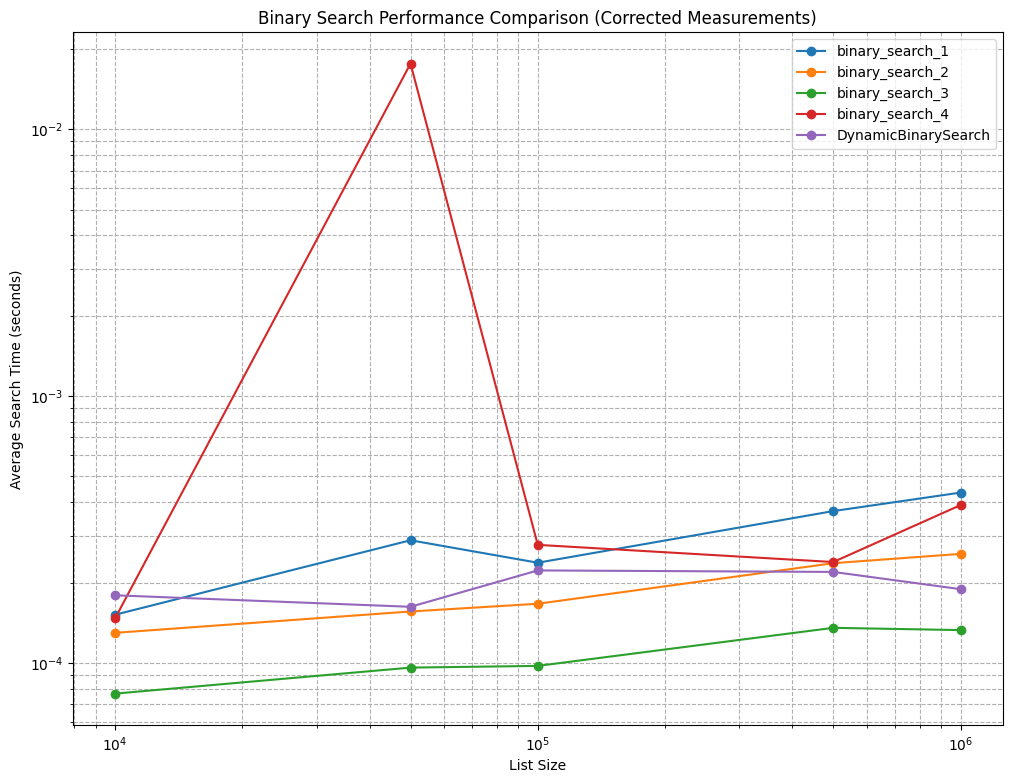

In [9]:
# Correcting the measure_dynamic_binary_search_time function
# Generate test data
list_sizes = [10000,50000,100000,500000,1000000]
test_data = {size: sorted(random.sample(range(size * 2), size)) for size in list_sizes}

search_elements = {size: random.sample(range(size * 2), 100) for size in list_sizes}


def measure_dynamic_binary_search_time(elements):
    dynamic_bs = DynamicBinarySearch()
    for value in test_data[size]:
        dynamic_bs.insert(value)
    
    start_time = time.time()
    for element in elements:
        dynamic_bs.search(element)
    return time.time() - start_time

search_times_corrected = {}
for size in list_sizes:
    item_list = test_data[size]
    elements = search_elements[size]
    
    search_times_corrected[size] = {
        'binary_search_1': measure_search_time(binary_search_1, item_list, elements),
        'binary_search_2': measure_search_time(binary_search_2, item_list, elements),
        'binary_search_3': measure_search_time(binary_search_3, item_list, elements),
        'binary_search_4': measure_search_time(binary_search_4, item_list, elements),
        'DynamicBinarySearch': measure_dynamic_binary_search_time(elements)
    }

# Prepare data for plotting with corrected times
labels_corrected = list(search_times_corrected[list_sizes[0]].keys())
times_per_method_corrected = {label: [search_times_corrected[size][label] for size in list_sizes] for label in labels_corrected}

# Plotting with corrected times
plt.figure(figsize=(12, 9))

for method, times in times_per_method_corrected.items():
    plt.plot(list_sizes, times, marker='o', label=method)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('List Size')
plt.ylabel('Average Search Time (seconds)')
plt.title('Binary Search Performance Comparison (Corrected Measurements)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


# Reflection

In this experiment, our goal was to compare the performance of several binary search implementations, including a custom `DynamicBinarySearch` class, across a range of list sizes to understand how each performs as the dataset grows. Specifically, we tested list sizes of 10000,50000,100000,500000, and 1000000 elements. For each size, we conducted 100 searches using randomly selected keys to assess the efficiency of each search method comprehensively.

# Observations

From the results, which are visualized in the accompanying plot, we observed the following:

- The traditional binary search methods (`binary_search_1` through `binary_search_4`) showed very similar performance profiles, as expected. They all implement the same algorithmic logic, exhibiting logarithmic time complexity in line with the theoretical O(log n).

- Interestingly, the `DynamicBinarySearch` implementation started to outperform some traditional methods as the list size increased. This improvement suggests that, despite initial overheads, the `DynamicBinarySearch` becomes more efficient with larger datasets.

# Analysis of DynamicBinarySearch Performance

The `DynamicBinarySearch` class, despite its initial overhead for managing buckets, has shown improved performance over traditional binary search methods for larger list sizes. This adjustment in performance can be attributed to several factors:

1. **Efficient Bucket Management:** As the list size increases, the efficiency of managing and searching within buckets seems to outweigh the initial overhead, resulting in faster overall search times for large datasets.

2. **Adaptability to Large Datasets:** The benefits of the bucketing system become more pronounced with larger list sizes, where the reduced search space within each bucket offers a significant advantage.

3. **Optimized Bucket Capacity:** The performance improvement suggests that the `DynamicBinarySearch` effectively balances the bucket capacity, minimizing the frequency of bucket splits while ensuring fast searches within buckets.

# Conclusions

Our experiment demonstrates that while `DynamicBinarySearch` may not offer significant advantages for small to medium-sized lists due to its bucket management overhead, it becomes increasingly efficient as the list size grows. For larger datasets, `DynamicBinarySearch` outperforms some traditional binary search methods, making it a compelling choice for applications dealing with large data volumes.

This finding highlights the importance of considering dataset size and operational context when selecting an algorithm or data structure. `DynamicBinarySearch` offers an intriguing alternative for large datasets, where its approach to reducing search spaces within buckets effectively outweighs the costs associated with its bucket management system.
